Estim100%|██████████████████████████████| 1000/1000 [00:44<00:00, 22.28it/s]


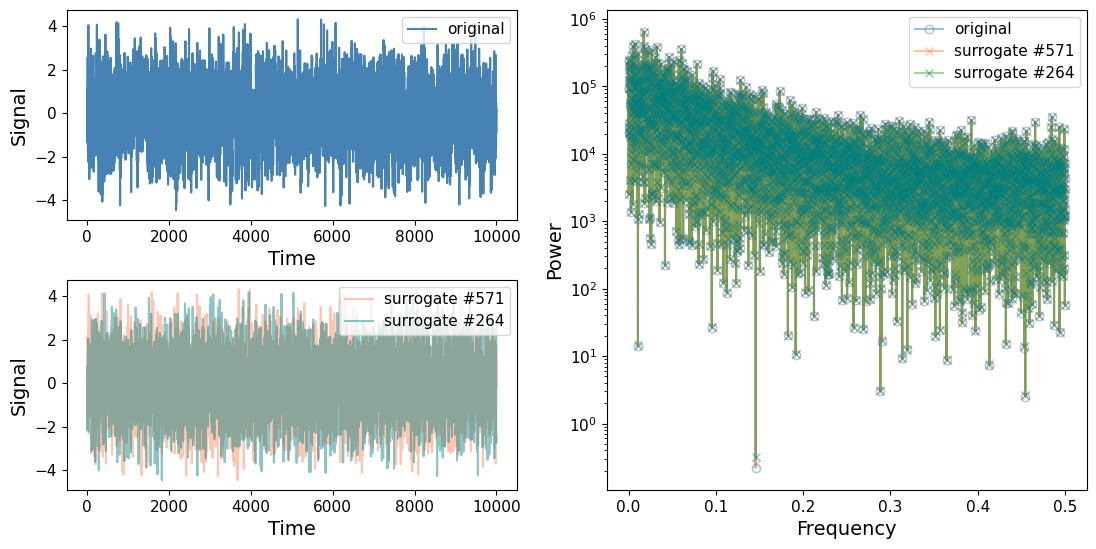

In [1]:
"""
Example usage of the IAAFT time series surrogates algorithm
===========================================================
"""
# Last modified: Tue Jun 22, 2021  11:56am
# Last modified: Tue Jun 22, 2021  11:56am
#
# Copyright (C) 2021  Bedartha Goswami <bedartha.goswami@uni-tuebingen.de> This
# program is free software: you can redistribute it and/or modify it under the
# terms of the GNU Affero General Public License as published by the Free
# Software Foundation, either version 3 of the License, or (at your option) any
# later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.

# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <https://www.gnu.org/licenses/>.
# -----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as pl
import iaaft

# generate an initial time series with AR(1) memory
n = 10000
beta = 0.65
eps = np.random.randn(n)
x = np.zeros(n)
x[0] = eps[0]
for i in range(1, n):
    x[i] = beta * x[i-1] + eps[i]

# estimate the power spectra of the initial time series
p = np.square(np.abs(np.fft.fft(x)))
freq = np.fft.fftfreq(n)

# estimate 100 IAAFT surrogates
ns = 1000
xs = iaaft.surrogates(x=x, ns=ns, verbose=True)

# estimate the power spectra of the surrogates
ps = np.zeros((ns, freq.shape[0]))
for i in range(ns):
    ps[i] = np.square(np.abs(np.fft.fft(xs[i])))

# plot the results
## set up the figure
AXLABFS, TIKLABFS = 14, 11
fig = pl.figure(figsize=[12., 6.])
ax1 = fig.add_axes([0.10, 0.55, 0.375, 0.35])
ax2 = fig.add_axes([0.10, 0.10, 0.375, 0.35])
ax3 = fig.add_axes([0.55, 0.10, 0.40, 0.80])

# plot original time series
ax1.plot(x, "steelblue", label="original")

# plot two random surrogate time series
idx = np.random.randint(ns, size=2)
clrs = ["coral", "teal", "goldenrod"]
for j, i in enumerate(idx):
    ax2.plot(xs[i], c=clrs[j], label="surrogate #%d" % i, alpha=0.45)

# plot the power spectra
k = np.argsort(freq)
k = k[int(len(k)/2):]
ax3.plot(freq[k], p[k], "o-", mec="steelblue", mfc="none",
         label="original", alpha=0.45)
for j, i in enumerate(idx):
    ax3.plot(freq[k], ps[i, k], "x-", mec=clrs[j], mfc="none",
            label="surrogate #%d" % i, alpha=0.45)
ax3.set_yscale("log")

# beautification
for ax in fig.axes:
    leg = ax.legend(loc="upper right")
    for txt in leg.get_texts():
        txt.set_size(TIKLABFS)
    ax.tick_params(labelsize=TIKLABFS)
for ax in [ax1, ax2]:
    ax.set_ylabel("Signal", fontsize=AXLABFS)
    ax.set_xlabel("Time", fontsize=AXLABFS)
ax3.set_xlabel("Frequency", fontsize=AXLABFS)
ax3.set_ylabel("Power", fontsize=AXLABFS)

pl.show()